# TP Challenge

Replace your_name  by your name 

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

## Importing Librairies

In [48]:
#import the librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


## Preprocessing

- Check if missing values

- Check if duplicates ( if yes delete duplicated rows)

In [49]:
#your code here
    
df = pd.read_csv('./data/train.csv')

#Check if duplicates ( if yes delete duplicated rows)
df_clean = df.drop('Id', axis=1).drop_duplicates()

#Check if missing values
missingValue = df_clean.isnull().sum().sort_values(ascending=False)
print(missingValue)

df_clean

V2     0
V56    0
V64    0
V63    0
V62    0
      ..
V29    0
V28    0
V27    0
V26    0
Buy    0
Length: 86, dtype: int64


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,13,1,2,3,3,0,2,0,7,5,...,0,0,0,1,0,0,0,0,0,0
4103,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
4104,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
4105,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1


## Visualization 

- Check if you have outliers in each features (columns) using seaborn or matplotlib
- Check the correlation between each columns ( seaborn can maybe help you.. )[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

- Plot the distribution of the target


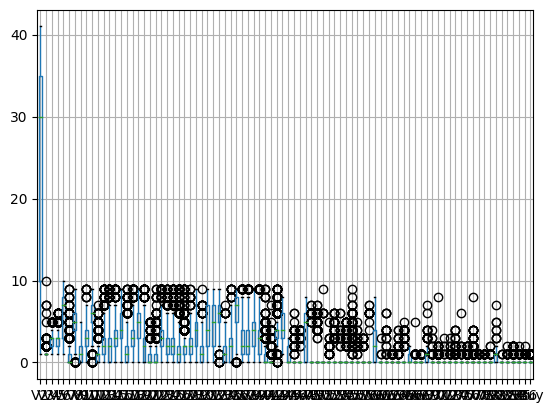

           V2        V3        V4        V5        V6        V7        V8  \
V2   1.000000 -0.044904 -0.046391  0.020545  0.992738 -0.190374  0.077089   
V3  -0.044904  1.000000  0.008348  0.033338 -0.051179 -0.005849 -0.038626   
V4  -0.046391  0.008348  1.000000 -0.330312 -0.008909  0.003128  0.052956   
V5   0.020545  0.033338 -0.330312  1.000000  0.015639 -0.039297  0.101487   
V6   0.992738 -0.051179 -0.008909  0.015639  1.000000 -0.195681  0.088719   
..        ...       ...       ...       ...       ...       ...       ...   
V83 -0.011296  0.004768  0.008701  0.008323 -0.014933 -0.008126  0.012664   
V84 -0.024144 -0.022316  0.032823  0.019187 -0.026713 -0.002187 -0.002360   
V85 -0.020698  0.024315  0.033449 -0.018947 -0.020185 -0.024766  0.016173   
V86 -0.045031  0.002076  0.027098 -0.015189 -0.043739 -0.008643  0.024520   
Buy -0.079053 -0.012765  0.033190  0.011037 -0.077290  0.009860  0.031360   

           V9       V10       V11  ...       V78       V79       V80  \
V2 

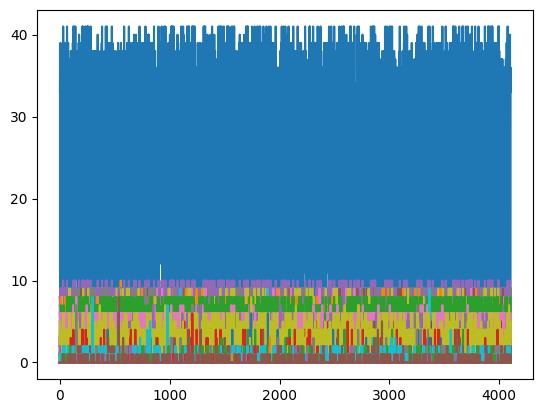

In [50]:
#your code here
#Check if you have outliers in each features (columns) using seaborn or matplotlib
df_clean.boxplot();
plt.show();

#Check the correlation between each columns 
correlation = df_clean.corr()
print(correlation)

sns.pairplot(df_clean);

#Plot the distribution of the target
plt.plot(df_clean);
plt.show();

## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

In [51]:
# your code here

x_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(df.drop(columns=['Id', 'Buy']), df['Buy'])
print(x_sample, y_sample)

     V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  ...  V77  V78  V79  V80  V81  \
0    13   1   3   2   3   0   4   0    5    8  ...    0    0    0    0    0   
1    37   1   2   3   8   1   4   1    4    5  ...    0    0    0    0    1   
2    13   1   3   3   3   2   4   1    3    6  ...    0    0    1    0    0   
3     7   1   4   2   2   1   5   2    3    8  ...    0    0    0    0    1   
4    34   1   2   3   8   1   4   1    4    7  ...    0    0    0    0    1   
..   ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...   
491   6   1   5   3   2   2   4   0    4    4  ...    0    0    0    0    1   
492   3   2   3   3   1   0   6   1    2    6  ...    0    0    0    0    1   
493   8   1   3   3   2   1   5   1    4    6  ...    0    0    0    0    1   
494   8   1   4   3   2   0   6   1    2    7  ...    0    0    0    0    1   
495  33   1   3   4   8   0   6   0    3    5  ...    0    0    0    0    1   

     V82  V83  V84  V85  V86  
0      0    0    0  

## Building models 

- Build a dummy model to have a baseline score

- Build a better model to classify your data and beat your baseline model

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve
--------------------------------









**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve


0.57
Accuracy: 0.57
Recall: 0.17647058823529413
Precision: 0.9
F1 Score: 0.2950819672131148


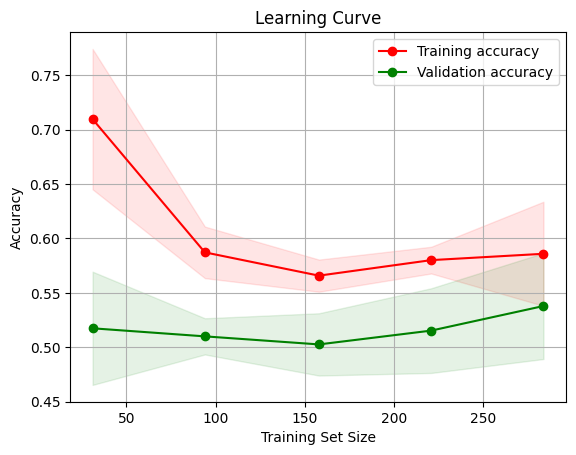

Accuracy: 0.55
Recall: 0.13725490196078433
Precision: 0.875
F1 Score: 0.23728813559322037


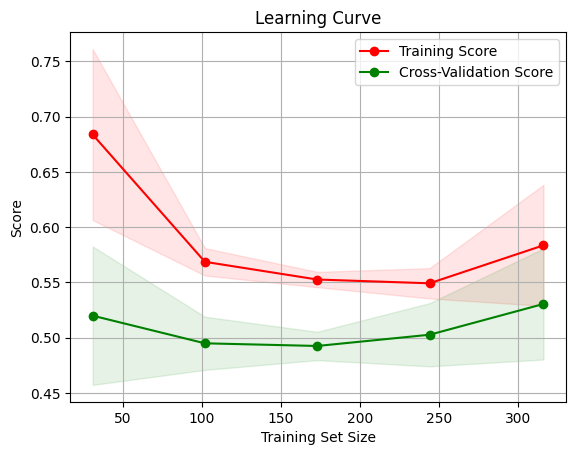

In [52]:
#your code
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training accuracy')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation accuracy')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
def plot_learning_curve_standards(estimator, x_scaled, y_train, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(model, x_scaled, y_train, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

    plt.legend(loc="best")
    plt.show()

def printValue(y, predict):
    accuracy = accuracy_score(y, predict)
    recall = recall_score(y, predict)
    precision = precision_score(y, predict)
    f1 = f1_score(y, predict)

    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)

#Build a dummy model to have a baseline score
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=0)

dummy = GaussianNB();
dummy.fit(x_train, y_train);
y_predict = dummy.predict(x_test);
baseline = accuracy_score(y_test, y_predict);
print(baseline)

#Build a better model to classify your data and beat your baseline model

#Check the : accuracy, Recall, Precision, f1 score
printValue(y_test, y_predict)

#Plot your learning curve
plot_learning_curve(dummy, x_train, y_train, cv=5, train_sizes=train_sizes)


#Try to improve your first model by using a robust scaler or StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

dummy.fit(x_train_scaled, y_train)

y_train_pred = dummy.predict(x_scaled)
y_test_pred = dummy.predict(x_test_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

#Check the : accuracy, Recall, Precision, f1 score
printValue(y_test, y_test_pred)

#Plot your learning curve
plot_learning_curve_standards(dummy, x_scaled, y_train, cv=5, train_sizes=train_sizes)


# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.